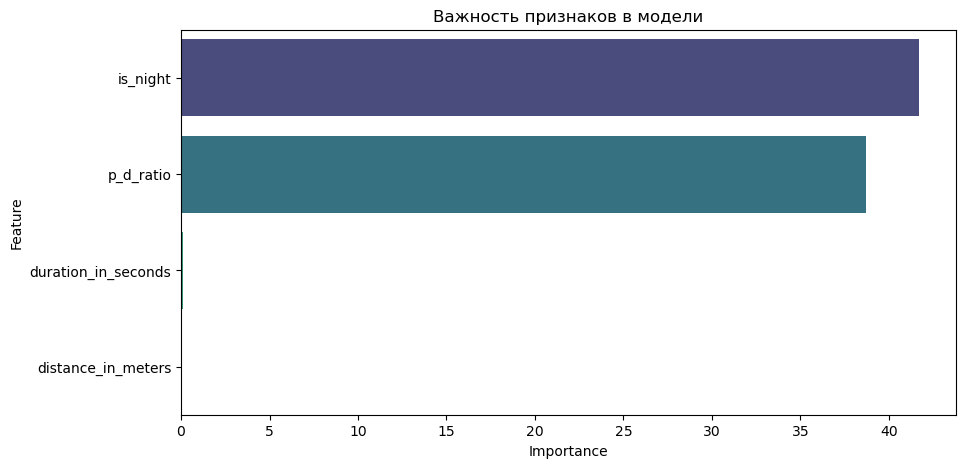

Модель: price = 98.91 + 0.0118*distance + 0.1105*duration + 38.7228*p_d_ratio + 41.7118*is_night
MAE: 65.14 руб | RMSE: 88.59 руб


In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

# Загрузка данных
df = pd.read_csv('C:/Users/fkola/Drivee/incity_detail_202504151000_Processed.csv')

# Преобразование времени
df['tender_timestamp'] = pd.to_datetime(df['tender_timestamp'])
df['hour'] = df['tender_timestamp'].dt.hour

# Фильтрация данных
df = df[(df['status_order'] == 'done') & (df['status_tender'] == 'done')].copy()
# Пример фильтрации выбросов
Q1 = df['price_tender_local'].quantile(0.05)
Q3 = df['price_tender_local'].quantile(0.95)
df = df[(df['price_tender_local'] >= Q1) & (df['price_tender_local'] <= Q3)]
# Расчет признаков
demand = df.groupby('hour')['order_id'].count().reset_index()
demand.columns = ['hour', 'demand']
df = df.merge(demand, on='hour')

unique_passengers = df.groupby('hour')['client_id'].count()
unique_drivers = df.groupby('hour')['driver_id'].nunique()
df['p_d_ratio'] = df['hour'].map(unique_passengers / unique_drivers)

df['is_night'] = df['hour'].apply(lambda x: 1 if x >= 23 or x <= 6 else 0)

# Подготовка данных для модели
X = df[['distance_in_meters', 'duration_in_seconds', 'p_d_ratio', 'is_night']]
y = df['price_tender_local']

# Разделение данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Предсказания и метрики
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)


# Важность признаков
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': np.abs(model.coef_)
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y='Feature', data=importance, palette='viridis')
plt.title('Важность признаков в модели')
plt.show()

# Вывод результатов
print(f"Модель: price = {model.intercept_:.2f} + {model.coef_[0]:.4f}*distance + "
      f"{model.coef_[1]:.4f}*duration + {model.coef_[2]:.4f}*p_d_ratio + "
      f"{model.coef_[3]:.4f}*is_night")
print(f"MAE: {mae:.2f} руб | RMSE: {rmse:.2f} руб")



In [4]:
input_data = {
    'distance_in_meters': 10520,      # 10,52 км
    'duration_in_seconds': 1200,      # 20 минут                    
    'p_d_ratio': 2,                   # 2 пассажира на 1 водителя
    'is_night': 1                     # 0 день 1 ночь df['is_night'] = df['hour'].apply(lambda x: 1 if x >= 23 or x <= 6 else 0)
}


# создаем ДФ который будем вбивать в предсказательную модель 
input_df = pd.DataFrame([input_data])

# Выбираем нужные признаки в том же порядке, как при обучении
X_input = input_df[['distance_in_meters', 'duration_in_seconds', 'p_d_ratio', 'is_night']]

# вывод
predicted_price = model.predict(X_input)[0]
print(f"Предсказанная цена: {predicted_price:.2f} руб")

Предсказанная цена: 540.51 руб


In [ ]:
Модель: price = 98.91 + 0.0118*distance + 0.1105*duration + 38.7228*p_d_ratio + 41.7118*is_night
MAE: 65.14 руб | RMSE: 88.59 руб

In [ ]:
Модель: price = 65.92 + 0.0135*distance + 0.1130*duration + 41.3376*p_d_ratio + 46.8669*is_night
MAE: 72.76 руб | RMSE: 106.68 руб

In [ ]:
Модель: price = 74.79 + 0.0135*distance + 0.1125*duration + 47.9068*p_d_ratio + 41.0376*is_night
MAE: 73.23 руб | RMSE: 107.28 руб
